<h1 style='text-align:center'>Predicting Spotify Song Popularity</h1>

**Name: RUHAINA KV**

**Organizaton: Entri Elevate**

**Date:**

**Overview of Problem Statement:**

The music marketplace is a fickle place. Artists that once topped the charts fall out of favor, while new artists may unexpectedly take the spotlight. There never seems to be a definite pattern and, regardless of what any one person may know, it’s practically impossible to predict which songs will make the cut.

With that in mind, if we take the task of prediction out of the hands of the decision makers and turn it over instead to a predictive model, perhaps the model can find a pattern that humans might overlook. By knowing which songs are popular on Spotify and the characteristics of those songs, perhaps we can find correlations algorithmically that will provide a little more certainty when guessing the next ‘hit’ . This project predicts popular songs through supervised machinlearning.ng

 **Objective:**

In this kernel, I developed a Music popularity predicting System utilizing the Spotify dataset. To ensure the system's accuracy and relevance, I performed comprehensive Exploratory Data Analysis (EDA) and data visualization. This process allowed me to gain a deep understanding of the data and identify key features essential for the recommendation model. By leveraging advanced analytical techniques and various Python libraries, I systematically selected and engineered features that significantly enhance the prediction algorithm's performance. This project not only demonstrates my proficiency in data analysis and machine learning but also showcases my ability to translate complex datasets into actionable insights, ultimately improving user experience through personalized music popularity predictions.

**Data Description:**

Source: https://data.world/ericfruchi/spotify/workspace/file?filename=spotify_dataset.csv 

Features available:

1.track_id: Unique identifier for each track. 
2.artist: Name of the artist or band.  
3.album_name: Name of the album the track is from.  
4.track_name: Name of the track.   
5.popularity: Popularity score of the track (typically ranging from 0 to 100). **#target variable**  
6.duration_ms: Length of the track in milliseconds.   
7.explicit:refers to a boolean field indicating whether a song contains explicit content, such as:- Profanity, Graphic violence, Mature themes, Sexual content.   
8.danceability: Measure of how suitable a track is for dancing (0 to 1 scale).   
9.energy: Measure of intensity and activity (0 to 1 scale).    
10.Key:represents the musical key of a song. It's an integer value ranging from 0 to 11, corresponding to the 12 musical keys.    
11.loudness: Overall loudness of a track in decibels (dB).    
12.mode:represents the musical mode of a song. It's an integer value with two possible values:0 - Minor,1 - Major  
13.speechiness: Measure of the presence of spoken words in a track (0 to 1 scale).   
14.acousticness: Measure of how acoustic a track is (0 to 1 scale).  
15.instrumentalness: Predicts whether a track is instrumental (0 to 1 scale).   
16.liveness: Measure of the presence of an audience in the recording (0 to 1 scale).   
17.valence: Measure of musical positiveness or happiness (0 to 1 scale).   
18.tempo: The speed of the track measured in beats per minute (BPM).   
19.time_signature: represents the rhythmic structure of a song.   
20.track_genre:refers to the musical genre classification of a song.    ong.

**Data Collection:**

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#data handling and manipulation
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

#data preprocessing and feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#model evaluation matrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#saving the model
import pickle

#warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load dataset
df=pd.read_csv("C:/Users/razil/Downloads/spotify_dataset.csv")
df.head(2)

Unnamed: 0                track_id       artists        album_name  \
0           0  5SuOikwiRyPMVoIQDJUgSV   Gen Hoshino            Comedy   
1           1  4qPNDBW1i3p13qLCt0Ki3A  Ben Woodward  Ghost (Acoustic)   

         track_name  popularity  duration_ms  explicit  danceability  energy  \
0            Comedy          73       230666     False         0.676   0.461   
1  Ghost - Acoustic          55       149610     False         0.420   0.166   

   ...  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0  ...    -6.746     0       0.1430        0.0322          0.000001     0.358   
1  ...   -17.235     1       0.0763        0.9240          0.000006     0.101   

   valence   tempo  time_signature  track_genre  
0    0.715  87.917               4     acoustic  
1    0.267  77.489               4     acoustic  

[2 rows x 21 columns]

In [4]:
#general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
#statistical informations of the numerical columns
df.describe()

Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

To begin, using the pandas .describe() method can give general statistical points of reference for each feature in the dataset. This is useful for a quick check on the mean, range and other points of interest.

In addition to statistical moments, the above also gives a general idea of how each feature is structured. For example, many features range between 0 and 1, while others are less restricted. The loudness feature even ranges between negative and positive values.

In [6]:
#Focusing on the target variable
df[['popularity']].describe()

popularity
count  114000.000000
mean       33.238535
std        22.305078
min         0.000000
25%        17.000000
50%        35.000000
75%        50.000000
max       100.000000

This gives a pretty consice overview of the target variable, popularity. One of the first things that stands out is that the mean and median both are in the 30s. This tells us right away that songs tend to have low popularity scores. Expanding this view, the Inter Quartile Range is from 17 and only extends to 50. Landing a half-way popular song with a score of only 51 would still be a fairly rare event.

One thing .describe() doesn't mention is the mode.

In [7]:
from scipy import stats
stats.mode(df.popularity)

ModeResult(mode=0, count=16020)

Somewhat unsurprisingly, the mode for popularity is a score of 0.

Sort and re-arrange:

Here, to get a better understanding of the data, the info is sorted by the popularity feature.

In [8]:
# Order the data by the target column and reset index to match new order
sort_data = df.sort_values('popularity', ascending=False).reset_index()
# Check that index 1 is the top rated song
sort_data.head(5)

index  Unnamed: 0                track_id                  artists  \
0  20001       20001  3nqQXoyQOWXiESFLlDF1hG     Sam Smith;Kim Petras   
1  81051       81051  3nqQXoyQOWXiESFLlDF1hG     Sam Smith;Kim Petras   
2  51664       51664  2tTmW7RDtMQtBk7m2rYeSw         Bizarrap;Quevedo   
3  81210       81210  4uUG5RXrOk84mYEfFvj3cK  David Guetta;Bebe Rexha   
4  89411       89411  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   

                              album_name  \
0              Unholy (feat. Kim Petras)   
1              Unholy (feat. Kim Petras)   
2  Quevedo: Bzrp Music Sessions, Vol. 52   
3                        I'm Good (Blue)   
4                             La Bachata   

                              track_name  popularity  duration_ms  explicit  \
0              Unholy (feat. Kim Petras)         100       156943     False   
1              Unholy (feat. Kim Petras)         100       156943     False   
2  Quevedo: Bzrp Music Sessions, Vol. 52          99       198937     False   
3                        I'm Good (Blue)          98       175238      True   
4                             La Bachata          98       162637     False   

   danceability  ...  loudness  mode  speechiness  acousticness  \
0         0.714  ...    -7.375     1       0.0864       0.01300   
1         0.714  ...    -7.375     1       0.0864       0.01300   
2         0.621  ...    -5.548     1       0.0440       0.01250   
3         0.561  ...    -3.673     0       0.0343       0.00383   
4         0.835  ...    -5.329     0       0.0364       0.58300   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000005     0.266    0.238  131.121               4        dance  
1          0.000005     0.266    0.238  131.121               4          pop  
2          0.033000     0.230    0.550  128.033               4      hip-hop  
3          0.000007     0.371    0.304  128.040               4          pop  
4          0.000002     0.218    0.850  124.980               4    reggaeton  

[5 rows x 22 columns]

In [9]:
#checking for null values
sort_data.isnull().sum()

index               0
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

null values are present only in 3 catagorical coloumns which we will be dropping in the encording step as it searves no importance for our analysis.


Checking the distribution:

The popularity column represents the target feature, so let's see how the values are distributed



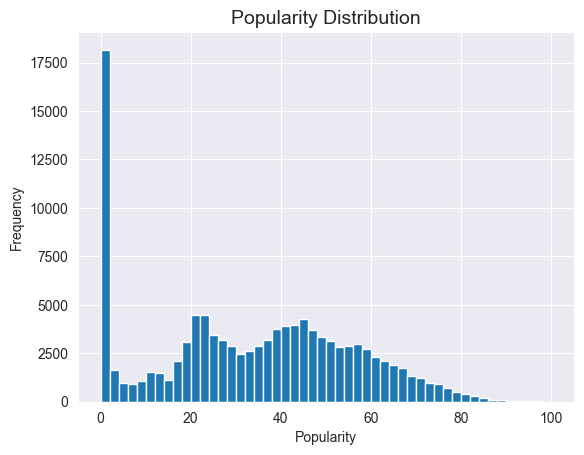

In [10]:
sns.set_style('darkgrid')
_ = sort_data['popularity'].plot(kind='hist', bins=50)
_ = plt.xlabel('Popularity')
_ = plt.title('Popularity Distribution', fontsize=14)

Clearly the data is heavily dominated by songs with a popularity of zero. This intuitively makes sense, as most songs are not popular, and songs that are popular are often grouped into lists of top 40 or top 100.

In [11]:
# What amount of data has popularity of zero
so = sort_data
print('Number of songs with popularity of 0: ', len(so[so.popularity == 0]))
print('Percent of data with a popularity of 0: {0:.2f}%'.format\
      (len(so[so.popularity == 0]) / len(so) * 100))

Number of songs with popularity of 0:  16020
Percent of data with a popularity of 0: 14.05%


Drop the zeros:

Considering the situation further, it might make sense to drop all the songs with a popularity of zero. The barrier to getting a song on spotify is practically non-existant, so many songs might be unpopular simply because of a lack of recognition as opposed to their inherent quality. An unpopular song could theoretically have the exact same audio features as a popular song but, due to cultural factors, may not get the same airplay. Observations like these may just add noise to the data so, as a baseline, they will be removed.

In [12]:
# Remove zero values
sort_data = sort_data[sort_data.popularity > 0]
sort_data[['mode', 'key', 'time_signature']] = \
    sort_data[['mode', 'key', 'time_signature']].astype('category')

# Check tail to verify no zeroes
sort_data.tail(3)

index  Unnamed: 0                track_id              artists  \
97977  68294       68294  7bTjec04WBUn3Ou0hxEspC  Don Omar;Nio Garcia   
97978  20966       20966  7GDGbF9PMU3sjxtmZFXWN4     Joel Corry;Mabel   
97979  68540       68540  7nE3oOOq9YVJbXhdJSO2Qf   Kevin Roldan;Wisin   

                        album_name track_name  popularity  duration_ms  \
97977  Feliz Cumpleaños con Perreo   Se Menea           1       190880   
97978                House Anthems     I Wish           1       181728   
97979       Fiesta Reggaeton 2010s      Deseo           1       219853   

       explicit  danceability  ...  loudness mode  speechiness acousticness  \
97977      True         0.711  ...    -6.288    1       0.1170       0.0472   
97978     False         0.686  ...    -2.717    0       0.0426       0.0896   
97979     False         0.708  ...    -3.745    1       0.1220       0.1190   

       instrumentalness  liveness  valence    tempo  time_signature  \
97977          0.000000    0.0806    0.932  179.936               4   
97978          0.000000    0.0648    0.733  123.997               4   
97979          0.000015    0.0543    0.697  178.039               4   

       track_genre  
97977       latino  
97978        dance  
97979       latino  

[3 rows x 22 columns]

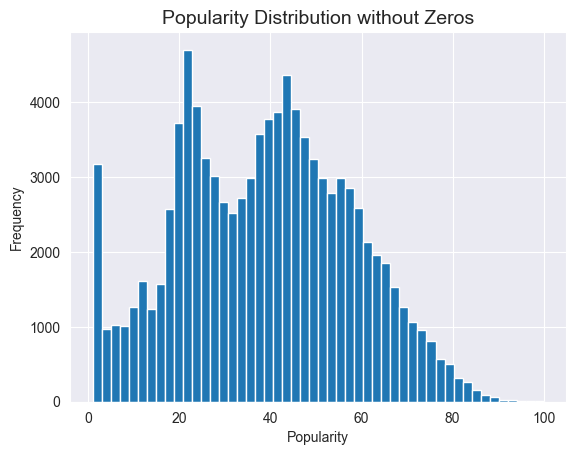

In [13]:
# Inspect new shape of data
_ = sort_data['popularity'].plot(kind='hist', bins=50)
_ = plt.xlabel('Popularity')
_ = plt.title('Popularity Distribution without Zeros', fontsize=14)

Lower values still outweigh the rest, but the distribution is more balanced now.

Verifying completeness of data

We can make sure there are no missing values using a seaborn heatmap to display any true null values.

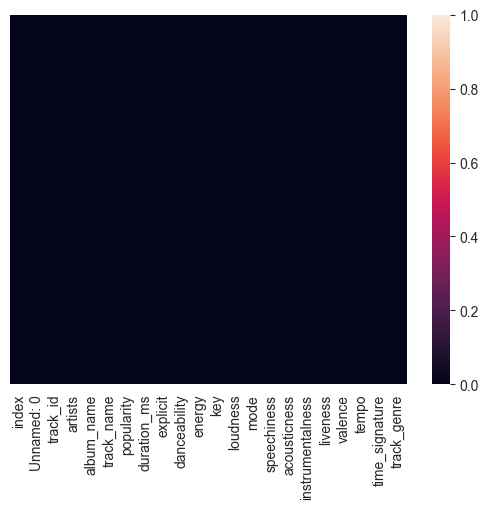

In [14]:
miss = sort_data.isnull()

_ = sns.heatmap(data=miss, vmin=0, vmax=1, yticklabels=False)

All values equate to zero, meaning the null status is false

**Outliers**

Most features in the data are assigned float values based on Spotify's own proprietary analysis methods. The one exception is the duration feature, leaving the potential for large outliers. Let's visualize the distribution for these.

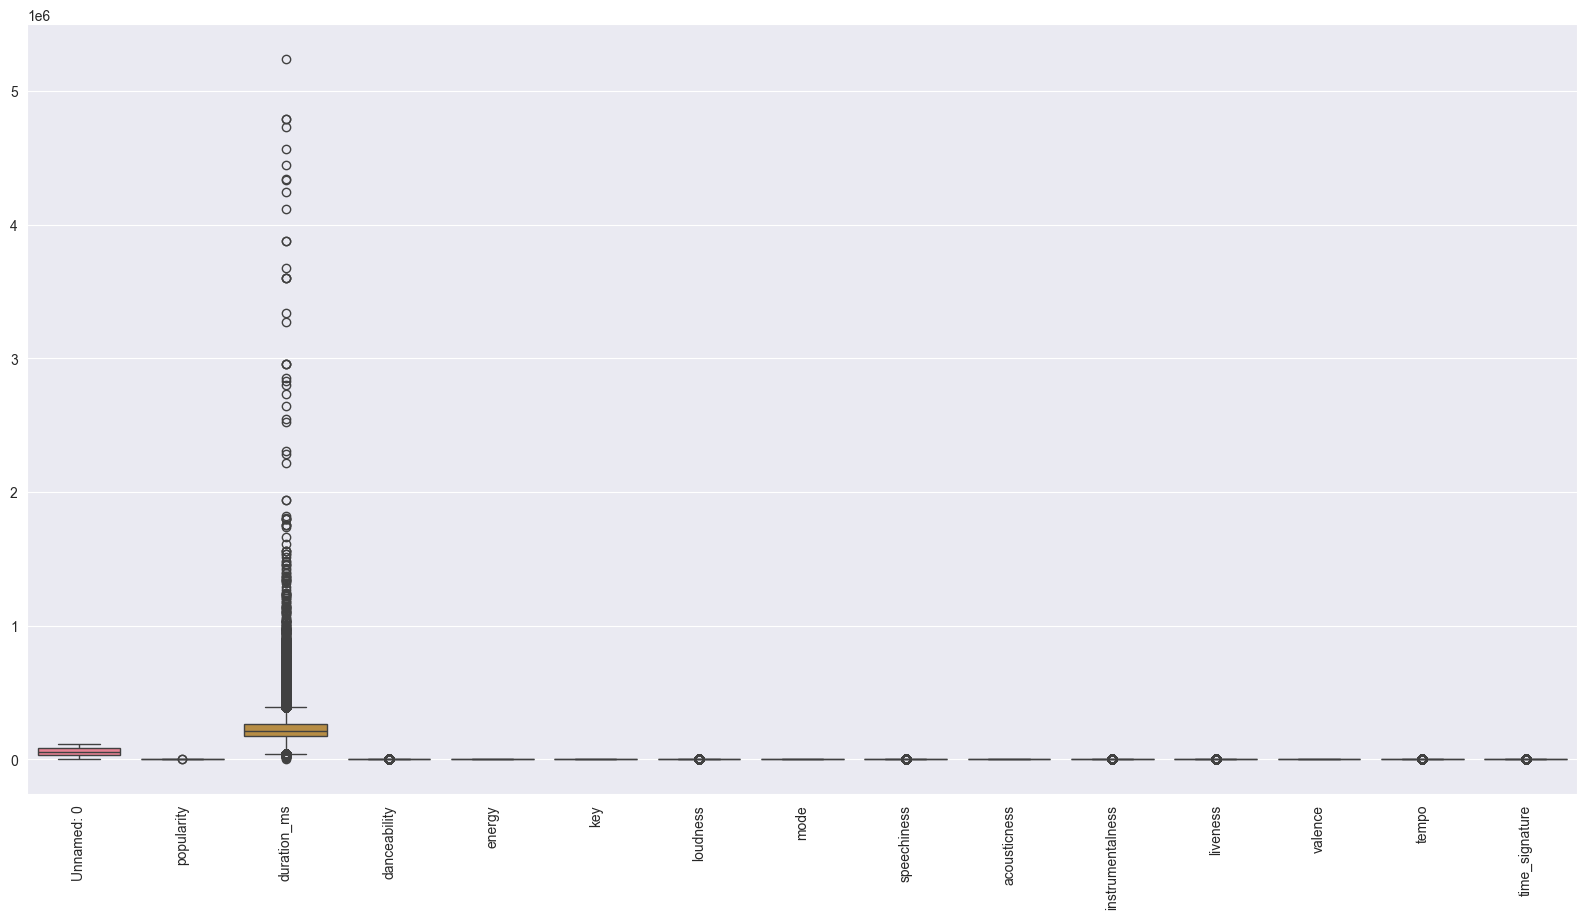

In [15]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (20,10))
sns.boxplot(data = df.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

As we can see, the IQR is rather limited and there are many extreme outliers for this feature. However, these outliers aren't necessarily anomolies. It's quite possible to have a song lasting several minutes. Furthermore, duration can indeed influence popularity. Fewer people may be inclined to listen to longer songs, keeping the number of plays low. Given these reasons, it makes sense to not drop these outliers.



Correlations

First, let's take a look at the correlation coefficients for the data features, and use a correlation heat map to help visualize how the different variables relate to each other.

In [16]:
# Generat correlation table
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                      'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration_ms', 'popularity']
correlation_matrix = df[numerical_features].corr()  
correlation_matrix

danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000  0.134325  0.259077     0.108626     -0.171533   
energy                0.134325  1.000000  0.761690     0.142509     -0.733906   
loudness              0.259077  0.761690  1.000000     0.060826     -0.589803   
speechiness           0.108626  0.142509  0.060826     1.000000     -0.002186   
acousticness         -0.171533 -0.733906 -0.589803    -0.002186      1.000000   
instrumentalness     -0.185606 -0.181879 -0.433477    -0.089616      0.104027   
valence               0.477341  0.258934  0.279848     0.036635     -0.107070   
tempo                -0.050450  0.247851  0.212446     0.017273     -0.208224   
duration_ms          -0.073426  0.058523 -0.003470    -0.062600     -0.103788   
popularity            0.035448  0.001056  0.050423    -0.044927     -0.025472   

                  instrumentalness   valence     tempo  duration_ms  \
danceability             -0.185606  0.477341 -0.050450    -0.073426   
energy                   -0.181879  0.258934  0.247851     0.058523   
loudness                 -0.433477  0.279848  0.212446    -0.003470   
speechiness              -0.089616  0.036635  0.017273    -0.062600   
acousticness              0.104027 -0.107070 -0.208224    -0.103788   
instrumentalness          1.000000 -0.324312 -0.050330     0.124371   
valence                  -0.324312  1.000000  0.078273    -0.154479   
tempo                    -0.050330  0.078273  1.000000     0.024346   
duration_ms               0.124371 -0.154479  0.024346     1.000000   
popularity               -0.095139 -0.040534  0.013205    -0.007101   

                  popularity  
danceability        0.035448  
energy              0.001056  
loudness            0.050423  
speechiness        -0.044927  
acousticness       -0.025472  
instrumentalness   -0.095139  
valence            -0.040534  
tempo               0.013205  
duration_ms        -0.007101  
popularity          1.000000

To also visualize these correlations, a heatmap is useful.

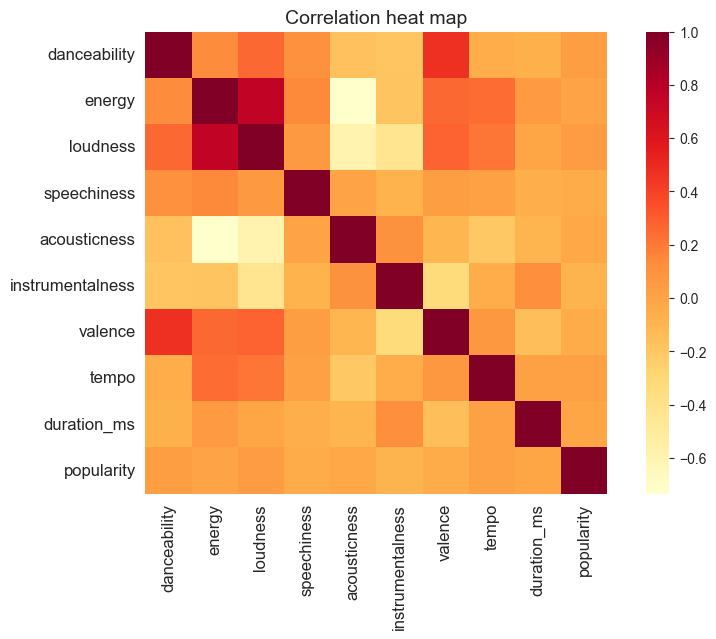

In [17]:
# Generate heat map using seaborn
fig, ax = plt.subplots(1,1, figsize=(10,6))
_ = sns.heatmap(df[numerical_features].corr(), square=True, cmap='YlOrRd')
_ = plt.title('Correlation heat map', fontsize=14)
_ = plt.xticks(fontsize=12)
_ = plt.yticks(fontsize=12)

**Key Observations:**
Danceability and Valence: The strongest correlation in the matrix is between danceability and valence (0.477), suggesting that tracks that are more danceable tend to also have a higher valence, which relates to the musical positiveness of a track.

Energy and Loudness: There is a significant positive correlation between energy and loudness (0.762), indicating that louder tracks tend to be more energetic.

Acousticness: This feature has a strong negative correlation with energy (-0.734) and loudness (-0.590), suggesting that more acoustic tracks are generally less energetic and quieter.

Instrumentalness and Other Features: Instrumentalness shows a negative correlation with several features, including energy, loudness, and valence, indicating that more instrumental tracks tend to have lower energy and valence scores.

Popularity: The correlations of the target variable, popularity, are relatively weak with other features. For instance, it has a very low correlation with energy (0.001) and danceability (0.035), suggesting that these features may not be strong predictors of popularity in this dataset.

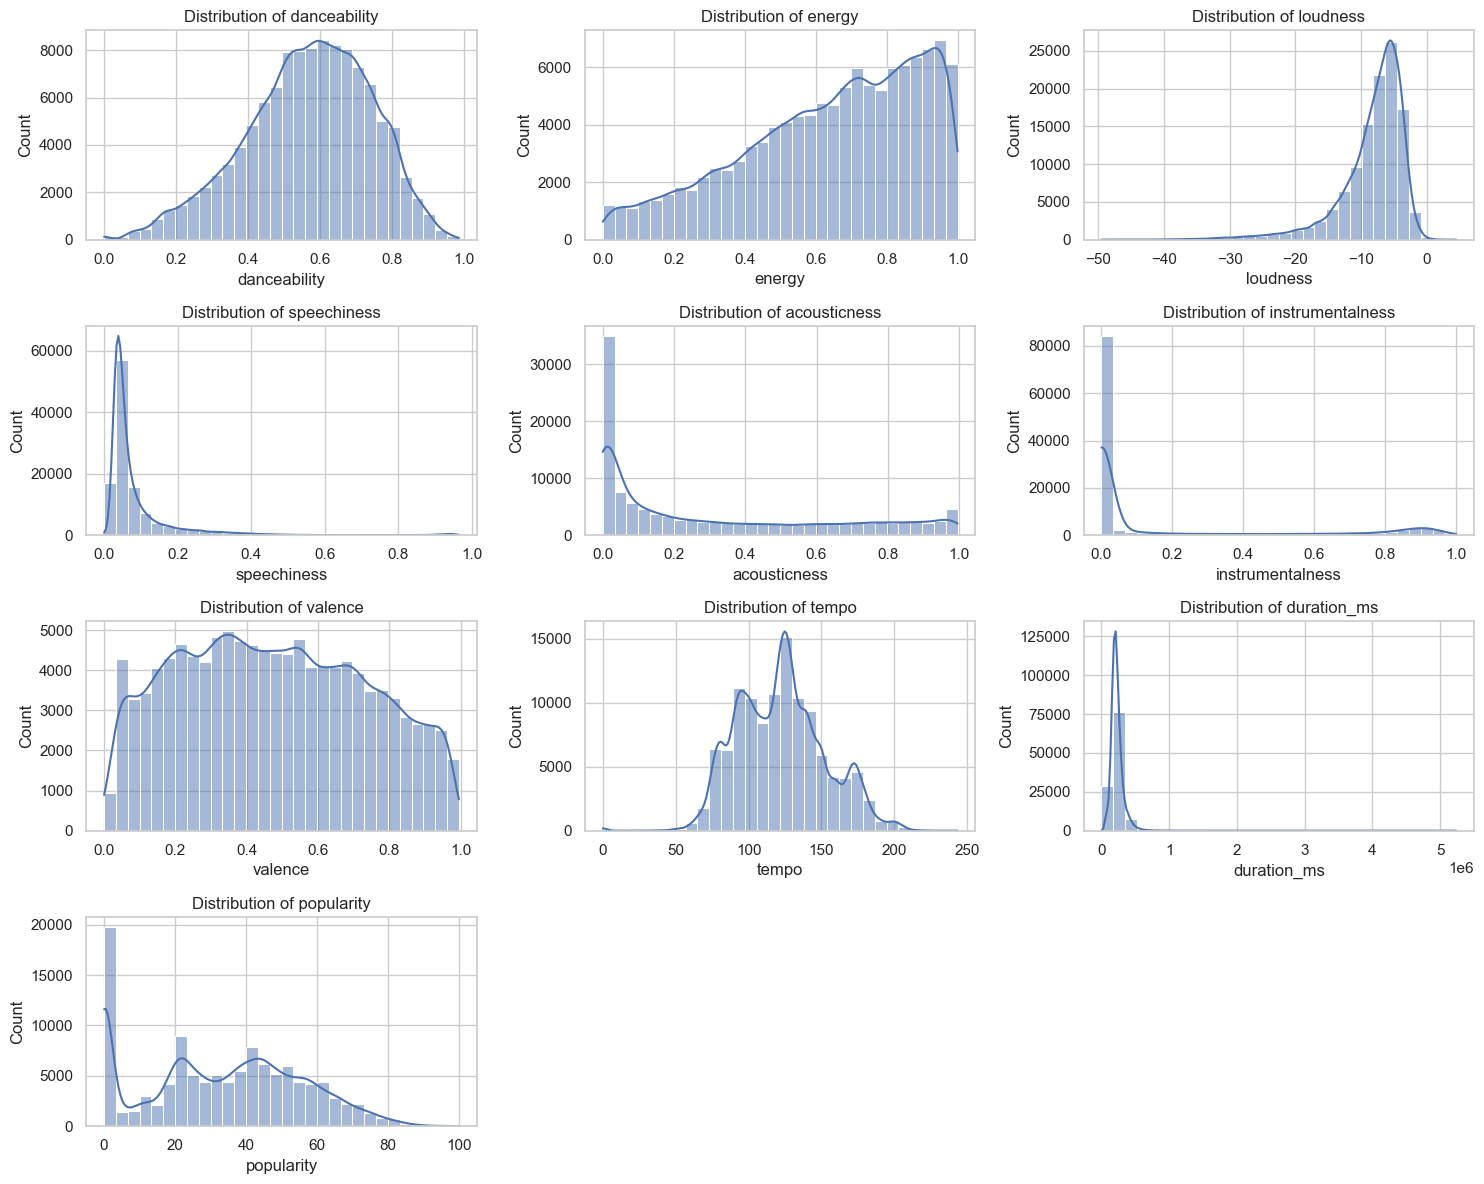

In [18]:
#insight on data distribution
# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Plot histograms for numerical features
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                      'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration_ms', 'popularity']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


**Observations from the Histograms:**
Danceability: shows a fairly normal distribution with a concentration of values around the middle range, indicating that most tracks have moderate danceability.

Energy: exhibit a skewed distribution, with some tracks being extremely energetic while most fall into the moderate range.

Loudness: This feature show a normal distribution, but has possible outliers on the higher end, indicating some tracks are significantly louder.

Speechiness:  has a right-skewed distribution, where most tracks have low speechiness, while a few have higher values, possibly representing spoken word or rap.

Acousticness: This feature shows a left-skewed distribution, indicating that most tracks are not very acoustic, with some exceptions.

Instrumentalness:  has a strong left skew, indicating that most tracks have low instrumentalness, while a few are highly instrumental.

Valence:  appears to be normally distributed, suggesting a balance of positive and negative musical content.

Tempo:  shows a fairly uniform distribution, reflecting the variety of tempos in different genres of music.

Duration (ms): This feature  show a normal distribution.

Popularity:  displays a left-skewed distribution, indicating that most tracks have lower popularity scores, with very few tracks achieving high popularity.

In [19]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


**Observations from the Boxplots:**
Danceability: The boxplot show a relatively compact distribution with a few potential outliers at the lower end, indicating that most tracks have moderate to high danceability.

Energy: displays a wider spread with potential outliers, especially on the higher end, suggesting that some tracks are significantly more energetic than the majority.

Loudness: The boxplot reveal a significant range, with potential outliers on both ends, indicating tracks that are either much quieter or much louder than average.

Speechiness: This feature show many low values with a few outliers at the higher end, indicating that most tracks have low speechiness while a small number have much higher values.

Acousticness: displays a concentration of values towards the lower end, with a few outliers representing highly acoustic tracks.

Instrumentalness: This feature show a large number of low values and potential outliers on the higher end, indicating a few highly instrumental tracks amidst predominantly non-instrumental ones.

Valence: The boxplot show a balanced distribution with a few outliers, suggesting that while most tracks have moderate positivity, some tracks are extremely positive or negative.

Tempo: presents a range without significant outliers, reflecting a diverse array of musical tempos.

Duration (ms): This boxplot indicate a typical range of song lengths, with a few outliers representing particularly long or short tracks.

Popularity: Likely reveals a concentration of lower popularity scores with several outliers at the high end, indicating a few tracks that are significantly more popular than the rest.

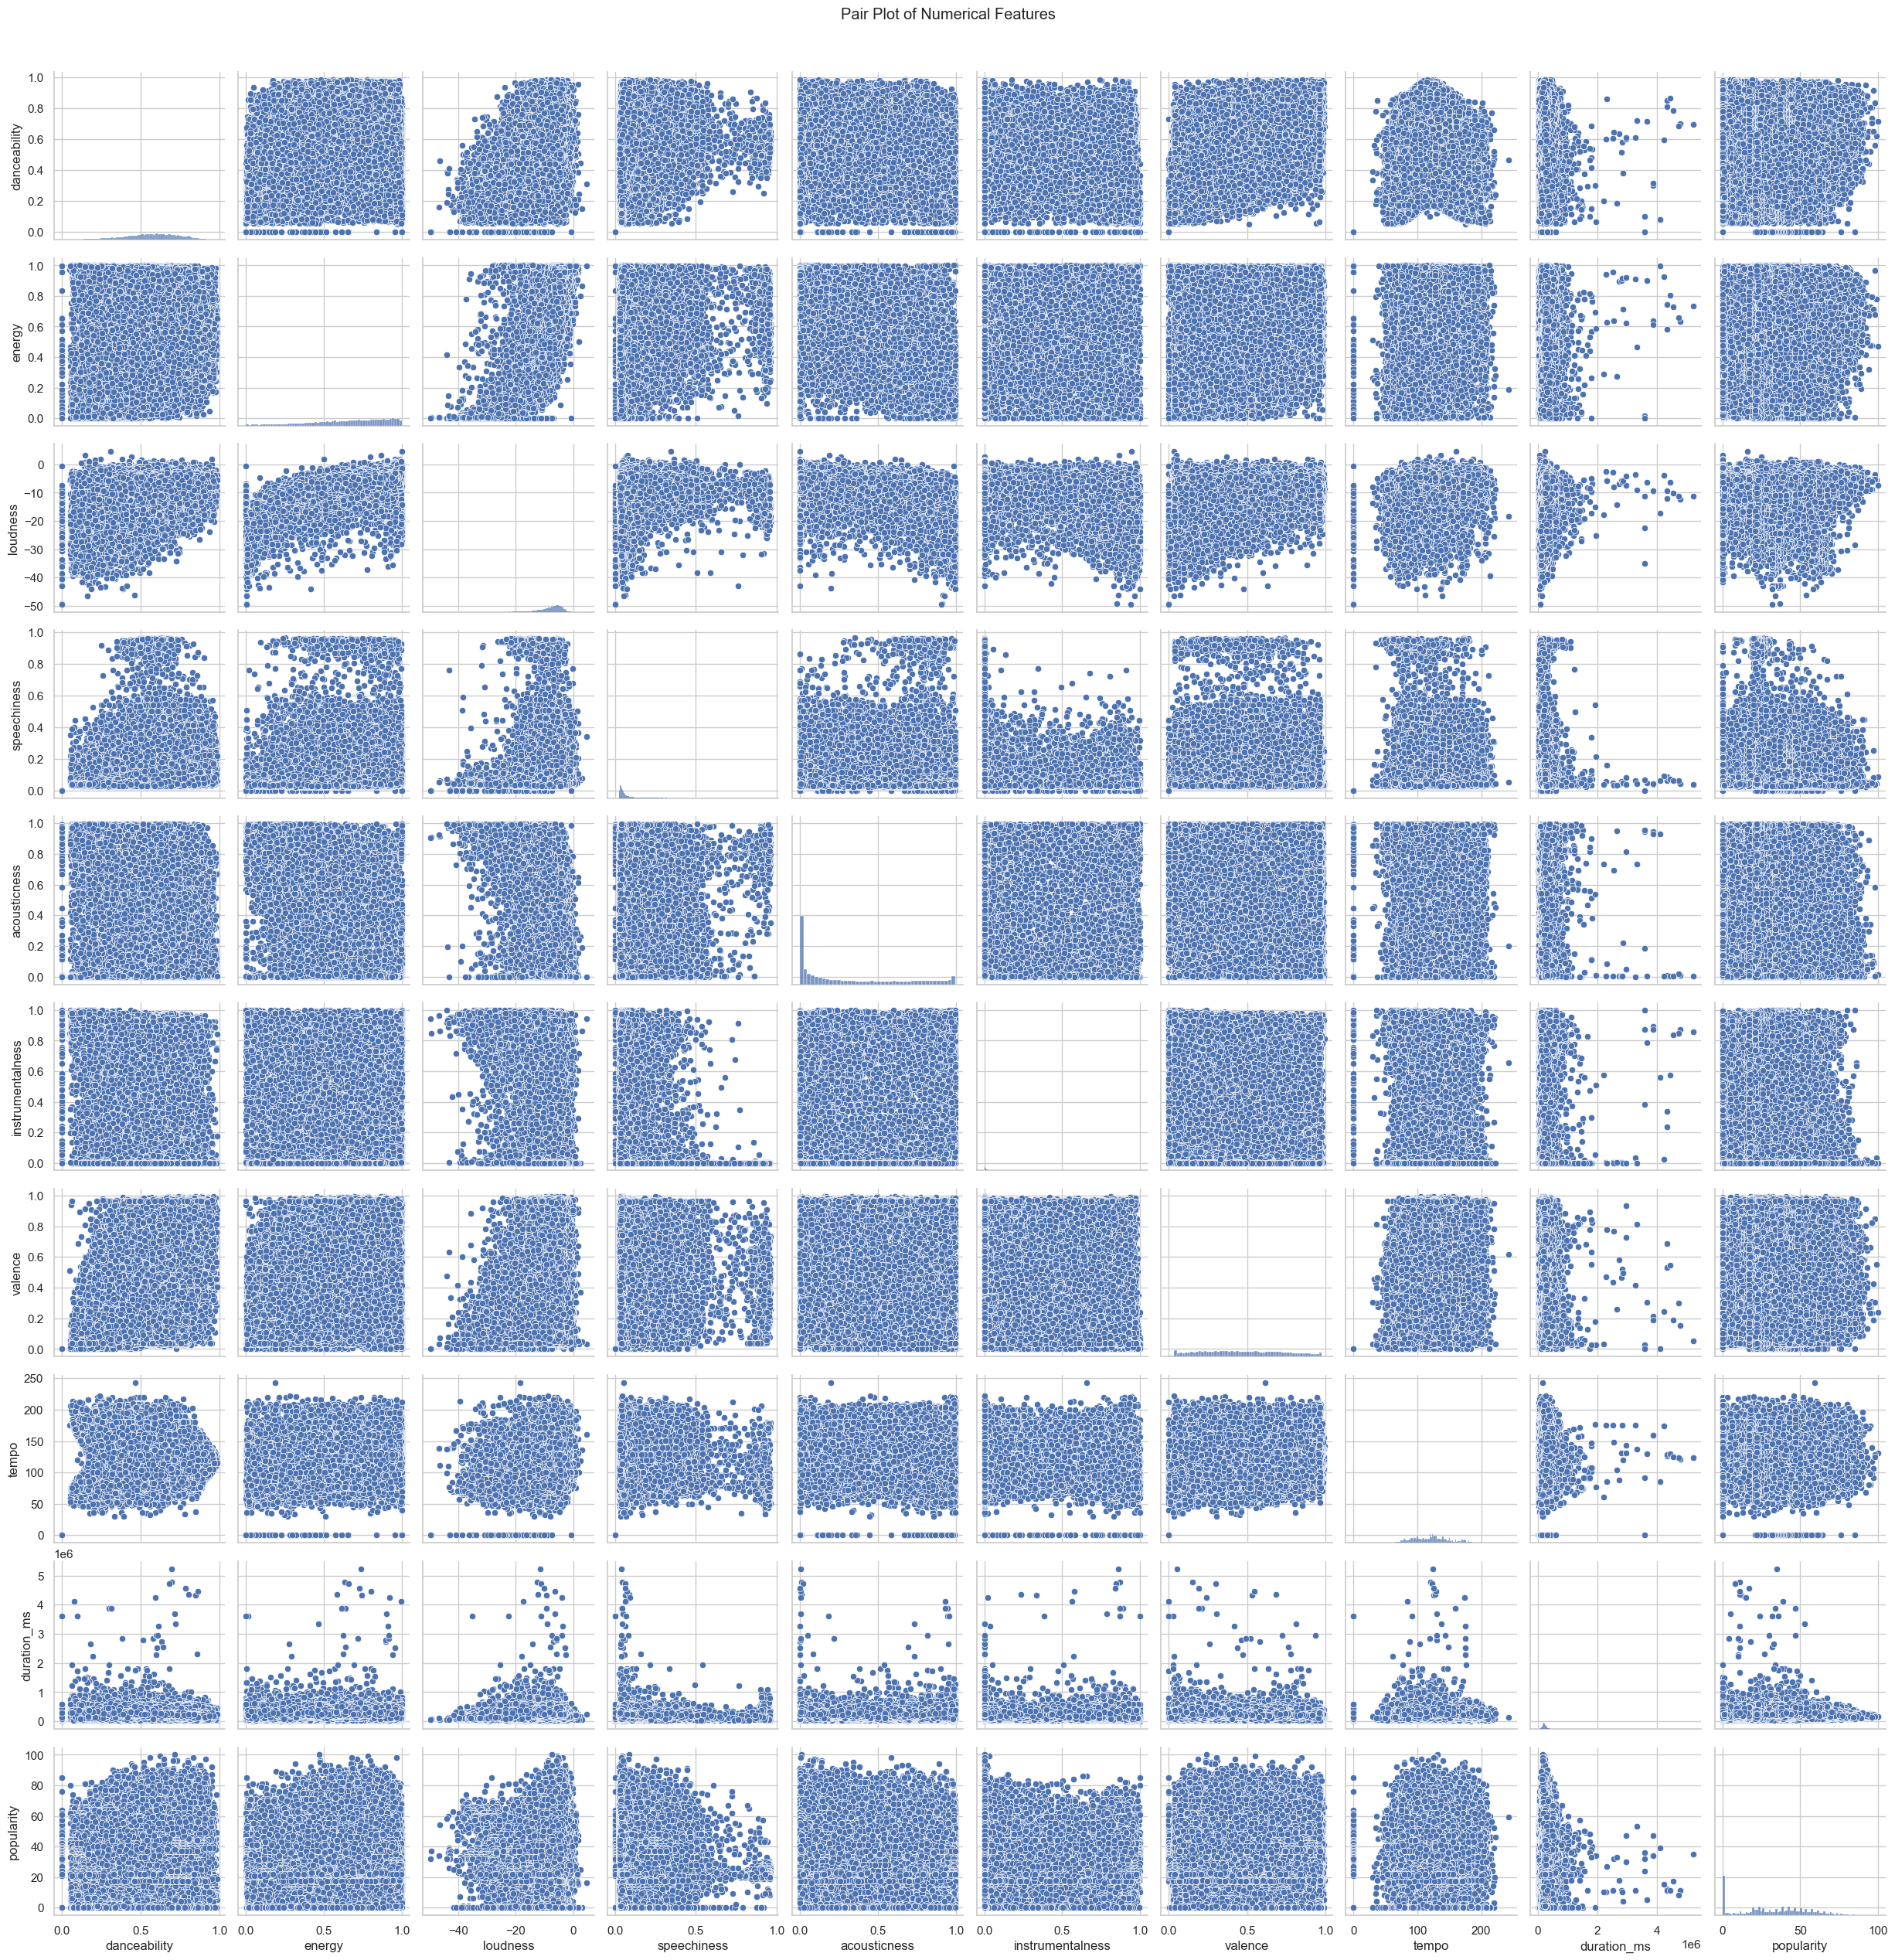

In [20]:
#Pair Plots
# Pair plot for selected features
sns.pairplot(df[numerical_features])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


**Observations from the Pair Plot:**
Visual Relationships: Each scatter plot allows us to visually assess the relationships between pairs of features. Strong linear relationships will appear as tight clusters along a line, while weaker relationships will show more spread.

Diagonal Histograms: The histograms on the diagonal provide insights into the distributions of each individual feature, complementing the scatter plots.

Identifying Correlations: we can notice specific pairs with stronger correlations, such as:

Energy vs. Loudness: shows a positive correlation, with energetic tracks also being louder.
Danceability vs. Valence: show some positive relationship, suggesting that more danceable tracks tend to have a higher positivity.

Outlier Detection: The pair plots also help identify outliers that might affect relationships, such as tracks that are extremely high in energy or popularity.

In [21]:
# KDE plot for popularity
plt.figure(figsize=(10, 6))
sns.kdeplot(df['popularity'], shade=True)
plt.title('KDE of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.show()

**Observations from the KDE Plot:**
Distribution Shape: The KDE plot reveals the overall shape of the popularity distribution. we can observe that it is left-skewed, with a concentration of tracks scoring lower on popularity and a gradual decline towards higher scores.

Density Peaks: The peaks in the KDE indicate where values are more concentrated. For example, here the plot shows a peak around lower popularity scores, it suggests that most tracks in the dataset are not highly popular.

Understanding the Spread: The width of the KDE curve provides insight into the spread of the popularity scores. A narrower curve indicates that scores are closely clustered around the mean, while a wider curve suggests more variability.


**Feature Engineering:**


In [22]:
import pandas as pd

# Sort and reset index
df_sort = df.sort_values('popularity', ascending=False).reset_index(drop=True)

# Drop unnecessary columns
df_ordered = df_sort.drop(['track_id', 'artists', 'album_name', 'track_name', 'Unnamed: 0'], axis=1)

# Classify popularity ratings
df_ordered['pop_rating'] = 'unpopular'
df_ordered.loc[(df_ordered['popularity'] > 50) & (df_ordered['popularity'] < 75), 'pop_rating'] = 'medium'
df_ordered.loc[df_ordered['popularity'] >= 75, 'pop_rating'] = 'popular'

# One-hot encoding for the genre
df_encoded = pd.get_dummies(df_ordered, columns=['track_genre'], drop_first=True)

# Convert explicit column to int
df_encoded['explicit'] = df_encoded['explicit'].astype(int)

# Display the combined DataFrame
print("Combined Encoded DataFrame:")
print(df_encoded)

# Check data types
print("\nData Types After Encoding:")
print(df_encoded.dtypes)

# Display the first few rows of the combined DataFrame
print("\nFirst few rows of the combined DataFrame:")
print(df_encoded.head())

Combined Encoded DataFrame:
        popularity  duration_ms  explicit  danceability  energy  key  \
0              100       156943         0         0.714   0.472    2   
1              100       156943         0         0.714   0.472    2   
2               99       198937         0         0.621   0.782    2   
3               98       175238         1         0.561   0.965    7   
4               98       162637         0         0.835   0.679    7   
...            ...          ...       ...           ...     ...  ...   
113995           0       281960         0         0.585   0.761    2   
113996           0       266600         0         0.703   0.510    8   
113997           0       209146         1         0.776   0.629    0   
113998           0       227520         1         0.807   0.606    3   
113999           0       225388         0         0.552   0.946    2   

        loudness  mode  speechiness  acousticness  ...  track_genre_spanish  \
0         -7.375     1      

**Feature Selection:**

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Define features and target
X = df_encoded.drop('popularity', axis=1)  
y = df_encoded['popularity']                

# Drop non-numeric columns
X = X.select_dtypes(exclude=['object'])

# Check for NaN values
if X.isnull().sum().any():
    X.fillna(0, inplace=True)  # Handle NaNs as necessary

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SelectKBest for feature selection
selector = SelectKBest(score_func=f_classif, k=10)  # Select the top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the boolean mask of selected features
mask = selector.get_support()

# Get the indices of the selected features
selected_indices = [i for i, m in enumerate(mask) if m]

# Fit Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Use the full set for fitting

# Get the feature importances
importances = rf.feature_importances_

# Create a DataFrame for selected feature importances using the indices of selected features
feature_importances = pd.DataFrame({
    'Feature': X.columns[mask],
    'Importance': importances[selected_indices]
})

# Display feature importances sorted by importance
print(feature_importances.sort_values(by='Importance', ascending=False))


                      Feature  Importance
0            instrumentalness    0.063095
5       track_genre_grindcore    0.001152
7             track_genre_idm    0.001096
6      track_genre_honky-tonk    0.001074
4  track_genre_detroit-techno    0.001052
9           track_genre_tango    0.001042
1     track_genre_black-metal    0.000998
2       track_genre_breakbeat    0.000994
8            track_genre_kids    0.000976
3   track_genre_chicago-house    0.000914


**Split Data into Training and Testing Sets:**


In [24]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling:**

In [25]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Transform test data


**Build the ML Model:**

**Decision Tree**

Before getting into complex ensemble methods, let's first try a simple decision tree.

In [26]:
from sklearn.model_selection import train_test_split

df_pop = df_encoded[df_encoded.pop_rating == 'popular']

df_med = df_encoded[df_encoded.pop_rating == 'medium']

df_unpop = df_encoded[df_encoded.pop_rating == 'unpopular']

# Set random seed
state=42

X_tr_p, X_ts_p, y_tr_p, y_ts_p = train_test_split(df_pop.drop(['popularity', 'pop_rating'], axis=1),\
                                                 df_pop.pop_rating, test_size=0.15, random_state=state)

X_tr_m, X_ts_m, y_tr_m, y_ts_m = train_test_split(df_med.drop(['popularity', 'pop_rating'], axis=1),\
                                                 df_med.pop_rating, test_size=0.15, random_state=state)

X_tr_up, X_ts_up, y_tr_up, y_ts_up = train_test_split(df_unpop.drop(['popularity', 'pop_rating'], axis=1),\
                                                 df_unpop.pop_rating, test_size=0.15, random_state=state)

In [27]:
import pandas as pd
pop_train = pd.concat([X_tr_p, y_tr_p], axis=1)
med_train = pd.concat([X_tr_m, y_tr_m], axis=1)
unpop_train = pd.concat([X_tr_up, y_tr_up], axis=1)

training = pd.concat([pop_train, med_train, unpop_train], axis=0)

training = training.sample(frac=1, random_state=state).reset_index(drop=True)


training.shape

(96899, 128)

In [28]:
pop_test = pd.concat([X_ts_p, y_ts_p], axis=1)
med_test = pd.concat([X_ts_m, y_ts_m], axis=1)
unpop_test = pd.concat([X_ts_up, y_ts_up], axis=1)

final_test = pd.concat([pop_test, med_test, unpop_test], axis=0)

final_test = final_test.sample(frac=1, random_state=state).reset_index(drop=True)

final_test.shape

(17101, 128)

In [29]:
X_class = training.drop('pop_rating', axis=1)
y_class = training.pop_rating

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.25, random_state=state)

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(exclude=['object']).columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Create the decision tree pipeline
dt_pipeline = Pipeline([ 
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=state))
])

# Fit the pipeline on the training data
dt_pipeline.fit(X_train, y_train)

# Make predictions on the test set
pred = dt_pipeline.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.74


**Bagging**.

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Create the Bagging Classifier with a default decision tree
bc = BaggingClassifier(
    DecisionTreeClassifier(max_depth=2, random_state=state), 
    n_estimators=200,
    random_state=state,
    n_jobs=-1
)

# Create the pipeline with preprocessing
bagging_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', bc)
])

# Fit the Bagging model to the training data
bagging_pipeline.fit(X_train, y_train)

# Predict on the test set
b_pred = bagging_pipeline.predict(X_test)

# Calculate and print accuracy
b_accuracy = accuracy_score(y_test, b_pred)
print(f'Accuracy of the Bagging model: {b_accuracy:.2f}')



Accuracy of the Bagging model: 0.77


**LogisticRegression**

In [32]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression pipeline with preprocessing
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=state))
])

# Fit the model to the training data
lr_pipeline.fit(X_train, y_train)

# Predict on the test set
lr_pred = lr_pipeline.predict(X_test)

# Calculate and print accuracy
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f'Accuracy of the Logistic Regression model: {lr_accuracy:.2f}')

Accuracy of the Logistic Regression model: 0.78


**svc**

In [33]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Create the SVM pipeline with the same preprocessor
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Use the same preprocessing steps
    ('classifier', SVC(random_state=state, kernel='rbf'))  # You can adjust the kernel and parameters
])

# Fit the model to the training data
svm_pipeline.fit(X_train, y_train)

# Predict on the test set
svm_pred = svm_pipeline.predict(X_test)

# Calculate and print accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f'Accuracy of the SVM model: {svm_accuracy:.2f}')


Accuracy of the SVM model: 0.79


**Random Forest**

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest pipeline with the same preprocessor
rf_pipeline = Pipeline([('preprocessor', preprocessor),('classifier', RandomForestClassifier(random_state=state))])

# Fit the model to the training data
rf_pipeline.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_pipeline.predict(X_test)

# Calculate and print accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Accuracy of the Random Forest model: {rf_accuracy:.2f}')


Accuracy of the Random Forest model: 0.82


**Boosting**

Let's also try boosting to see if the model improves when running sequentially.

In [35]:
#Adaboost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create the AdaBoost pipeline with the same preprocessor
ada_pipeline = Pipeline([('preprocessor', preprocessor),('classifier', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=state))  # Adjust parameters if needed
])

# Fit the model to the training data
ada_pipeline.fit(X_train, y_train)

# Predict on the test set
ada_pred = ada_pipeline.predict(X_test)

# Calculate and print accuracy
ada_accuracy = accuracy_score(y_test, ada_pred)
print(f'Accuracy of the AdaBoost model: {ada_accuracy:.2f}')


Accuracy of the AdaBoost model: 0.78


In [36]:
#GradientBoost

from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting pipeline with the same preprocessor
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Use the same preprocessing steps
    ('classifier', GradientBoostingClassifier(random_state=state))  # You can adjust parameters if needed
])

# Fit the model to the training data
gb_pipeline.fit(X_train, y_train)

# Predict on the test set
gb_pred = gb_pipeline.predict(X_test)

# Calculate and print accuracy
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f'Accuracy of the Gradient Boosting model: {gb_accuracy:.2f}')


Accuracy of the Gradient Boosting model: 0.78


**Model Evaluation:**

We'll evaluate the models using classification metrics.

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Evaluation ---")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))


In [38]:
# SVM
evaluate_model(y_test, svm_pred, "SVM")

# Random Forest
evaluate_model(y_test, rf_pred, "Random Forest")

# AdaBoost
evaluate_model(y_test, ada_pred, "AdaBoost")

# Gradient Boosting
evaluate_model(y_test, gb_pred, "Gradient Boosting")

# Logistic Regression
evaluate_model(y_test, lr_pred, "Logistic Regression")

# Bagging Classifier
evaluate_model(y_test, b_pred, "Bagging Classifier")


--- SVM Evaluation ---
Confusion Matrix:
 [[ 1871     1  3424]
 [  116     5   459]
 [  969     2 17378]]

Classification Report:
               precision    recall  f1-score   support

      medium       0.63      0.35      0.45      5296
     popular       0.62      0.01      0.02       580
   unpopular       0.82      0.95      0.88     18349

    accuracy                           0.79     24225
   macro avg       0.69      0.44      0.45     24225
weighted avg       0.77      0.79      0.76     24225

--- Random Forest Evaluation ---
Confusion Matrix:
 [[ 2373    18  2905]
 [  134    49   397]
 [  855    38 17456]]

Classification Report:
               precision    recall  f1-score   support

      medium       0.71      0.45      0.55      5296
     popular       0.47      0.08      0.14       580
   unpopular       0.84      0.95      0.89     18349

    accuracy                           0.82     24225
   macro avg       0.67      0.49      0.53     24225
weighted avg       0.

Hyperparameter tuning is essential for optimizing model performance. we can tune the best model with high accuracy to further improve the accuracy.in this case we can see that the Random Forest model has the best accuracy score.

 **Hyperparameter Tuning:**

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Define a reduced parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt'],  # Valid option
    'classifier__bootstrap': [True]         # One option
}

# Create the Random Forest pipeline with preprocessing
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessor defined earlier
    ('classifier', RandomForestClassifier(random_state=state))
])

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_pipeline, 
    param_distributions=param_grid, 
    n_iter=20,               # Number of combinations to try
    cv=3,                    # Fewer folds
    scoring='accuracy',      # Use accuracy as the scoring metric
    n_jobs=-1                # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")

# Use the best model to predict on the test set
best_model = random_search.best_estimator_
rf_pred = best_model.predict(X_test)

# Evaluate the best model
evaluate_model(y_test, rf_pred, "Random Forest (Tuned)")


Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': None, 'classifier__bootstrap': True}
Best Cross-Validation Score: 0.81
--- Random Forest (Tuned) Evaluation ---
Confusion Matrix:
 [[ 2350    17  2929]
 [  137    47   396]
 [  831    38 17480]]

Classification Report:
               precision    recall  f1-score   support

      medium       0.71      0.44      0.55      5296
     popular       0.46      0.08      0.14       580
   unpopular       0.84      0.95      0.89     18349

    accuracy                           0.82     24225
   macro avg       0.67      0.49      0.53     24225
weighted avg       0.80      0.82      0.80     24225



this shows that there is no room for the model improvement for this data. we can now save this model for the future use


**Save the Model**

In [41]:
import pickle

# Save the best model using pickle
with open('best_random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Model saved as 'best_random_forest_model.pkl'")

Model saved as 'best_random_forest_model.pkl'


**Test with Unseen Date**

In [1]:
import numpy as np
import pandas as pd
import random
import string

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
n_samples = 10

# Generate synthetic data
# For categorical data, we can create random strings for artists, album names, and track names
def random_string(length=10):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

track_ids = [random_string(8) for _ in range(n_samples)]
artists = [random_string(5) for _ in range(n_samples)]
album_names = [random_string(7) for _ in range(n_samples)]
track_names = [random_string(6) for _ in range(n_samples)]

# Numeric features
popularity = np.random.normal(33.24, 22.31, n_samples).clip(0, 100).astype(int)
duration_ms = np.random.normal(228029, 107297, n_samples).clip(0).astype(int)
explicit = np.random.choice([True, False], n_samples)  # Randomly choosing True/False
danceability = np.random.normal(0.5668, 0.1735, n_samples).clip(0, 1)
energy = np.random.normal(0.6414, 0.2515, n_samples).clip(0, 1)
key = np.random.randint(0, 12, n_samples)  # we know keys are in the range 0-11
loudness = np.random.normal(-8.259, 5.029, n_samples)
mode = np.random.randint(0, 2, n_samples)  # we know mode is binary (0 or 1)
speechiness = np.random.normal(0.6376, 0.4807, n_samples).clip(0, 1)
acousticness = np.random.normal(0.0847, 0.1057, n_samples).clip(0, 1)
instrumentalness = np.random.normal(0.3149, 0.3325, n_samples).clip(0, 1)
liveness = np.random.normal(0.1561, 0.3096, n_samples).clip(0, 1)
valence = np.random.normal(0.2136, 0.1904, n_samples).clip(0, 1)
tempo = np.random.normal(122.15, 29.98, n_samples).clip(0)  # Clip to be non-negative
time_signature = np.random.randint(0, 6, n_samples)  # we know time signature is between 0-5
track_genre = [random.choice(['Pop', 'Rock', 'Hip-Hop', 'Jazz', 'Classical', 'Electronic']) for _ in range(n_samples)]

# Create a DataFrame
synthetic_data = pd.DataFrame({
    'Unnamed: 0': range(n_samples),  # Placeholder index
    'track_id': track_ids,
    'artists': artists,
    'album_name': album_names,
    'track_name': track_names,
    'popularity': popularity,
    'duration_ms': duration_ms,
    'explicit': explicit,
    'danceability': danceability,
    'energy': energy,
    'key': key,
    'loudness': loudness,
    'mode': mode,
    'speechiness': speechiness,
    'acousticness': acousticness,
    'instrumentalness': instrumentalness,
    'liveness': liveness,
    'valence': valence,
    'tempo': tempo,
    'time_signature': time_signature,
    'track_genre': track_genre
})

print(synthetic_data)


   Unnamed: 0  track_id artists album_name track_name  popularity  \
0           0  nlYmBcZK   w79d9    29cyjUi     MHKmQi          44   
1           1  D3TrTN6O   QAqI7    mtfZ2ei     qEq8o7          30   
2           2  2MypSJKX   8qANR    KKJ5I0x     sBLKql          47   
3           3  FIPRddO7   nTEpk    OXO8YSJ     g7nSlh          67   
4           4  Ztw9cCeE   fWOSE    RxETvx9     nSgVS1          28   
5           5  LnyYk6b4   4fceK    NpURPwI     WzASDb          28   
6           6  ypsJRt2G   SAfsM    PMGq2N6     EQK8k7          68   
7           7  D03011eQ   C3cxB    h4j8NZy     QwRr5Q          50   
8           8  sUcDOZKh   1Yzya    NWmDcIa     0e95vh          22   
9           9  C9Ajl8po   Y5bpW    5U8kDX0     UFx25d          45   

   duration_ms  explicit  danceability    energy  ...   loudness  mode  \
0       178305     False      0.588005  0.583693  ...  -8.477947     0   
1       178057     False      0.477372  0.739321  ...  -9.643488     1   
2       253990    

In [4]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10 non-null     int64  
 1   track_id          10 non-null     object 
 2   artists           10 non-null     object 
 3   album_name        10 non-null     object 
 4   track_name        10 non-null     object 
 5   popularity        10 non-null     int32  
 6   duration_ms       10 non-null     int32  
 7   explicit          10 non-null     bool   
 8   danceability      10 non-null     float64
 9   energy            10 non-null     float64
 10  key               10 non-null     int32  
 11  loudness          10 non-null     float64
 12  mode              10 non-null     int32  
 13  speechiness       10 non-null     float64
 14  acousticness      10 non-null     float64
 15  instrumentalness  10 non-null     float64
 16  liveness          10 non-null     float64
 17  

In [8]:
import pandas as pd

# Sort and reset index
df_sort = synthetic_data.sort_values('popularity', ascending=False).reset_index(drop=True)

# Drop unnecessary columns
df_ordered = df_sort.drop(['track_id', 'artists', 'album_name', 'track_name', 'Unnamed: 0'], axis=1)

# Classify popularity ratings
df_ordered['pop_rating'] = 'unpopular'
df_ordered.loc[(df_ordered['popularity'] > 50) & (df_ordered['popularity'] < 75), 'pop_rating'] = 'medium'
df_ordered.loc[df_ordered['popularity'] >= 75, 'pop_rating'] = 'popular'

# One-hot encoding for the genre
df_encoded = pd.get_dummies(df_ordered, columns=['track_genre'], drop_first=True)

# Convert explicit column to int
df_encoded['explicit'] = df_encoded['explicit'].astype(int)


In [19]:
import pandas as pd
import joblib

# Load the model
model_path = 'best_random_forest_model.pkl'
model = joblib.load(model_path)

# Get the feature names the model expects
feature_columns = model.feature_names_in_

# Check the available columns in df_encoded
available_columns = df_encoded.columns.tolist()

# Identify missing columns
missing_columns = [col for col in feature_columns if col not in available_columns]

# Create a DataFrame for X_test including all necessary columns
X_test = df_encoded[[col for col in feature_columns if col in available_columns]].copy()

# Create a DataFrame for missing columns with default values (0)
if missing_columns:
    missing_data = pd.DataFrame(0, index=X_test.index, columns=missing_columns)
    X_test = pd.concat([X_test, missing_data], axis=1)

# Ensure the order of columns matches the model's expectations
X_test = X_test[feature_columns]  # This ensures the same order

# Step 3: Make predictions
predictions = model.predict(X_test)

# Add predictions to the DataFrame
df_encoded['predicted_pop_rating'] = predictions

# Print or save the results
print(df_encoded[['popularity', 'pop_rating', 'predicted_pop_rating']])


   popularity pop_rating predicted_pop_rating
0          68     medium            unpopular
1          67     medium            unpopular
2          50  unpopular            unpopular
3          47  unpopular            unpopular
4          45  unpopular            unpopular
5          44  unpopular            unpopular
6          30  unpopular            unpopular
7          28  unpopular            unpopular
8          28  unpopular            unpopular
9          22  unpopular            unpopular


**Interpretation of Results (Conclusion)**

The analysis of the predicted popularity ratings yields several important insights:

* Despite some tracks having moderate current popularity ratings (68 and 67), they are still predicted to be "unpopular." This suggests that current metrics may not fully capture the potential for broader appeal or sustained engagement with listeners.
* The overwhelming majority of tracks are classified as "unpopular," indicating a potential disconnect between the music and audience preferences. This could imply that factors influencing popularity, such as genre trends or listener demographics, are not being adequately met.
* The consistent prediction of "unpopular" ratings opens avenues for further exploration into what might enhance a track's appeal. Analyzing listener feedback, current trends, and effective marketing strategies could provide actionable insights for future releases.

In summary, while some tracks exhibit current popularity, the predictive analysis highlights significant challenges in achieving broader acceptance. A strategic reassessment may be crucial for optimizing future music projects.

**Future Work**

To enhance the understanding of music popularity and improve predictive accuracy, the following areas of future work are recommended:

* Incorporate data on listener behaviors, such as streaming counts, shares, and playlist additions, to create a more comprehensive picture of popularity.
*  Analyze how trends in music popularity change over time, considering seasonal influences or cultural events.
*  Explore deep learning algorithms for potentially higher accuracy.
*  
Update the model periodically with new data

By pursuing these avenues, the goal will be to create a more robust understanding of music popularity, ultimately leading to improved predictions and strategies that resonate more effectively with audiences.er.